In [4]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim
from itertools import combinations
import scipy.integrate as integrate


# 1. 

## a) 
La constante indica la magnitud de la proporcionalidad entre la magnitud de la fuerza que recibe el objeto y el cubo de la deformación que esta presenta.


## b)
Debido a la naturaleza del sistema se puede ver para mantener la energia del sistema es necesario aislarlo, no obtsante, en nuestra modelacion pudimos ver que este movimiento es de tipo no censervativo



In [ ]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    
    

    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=2):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
    
        
    # Getters
    
    def GetPositionDifference(self, other):
        resta = self.rVector - other.rVector
        return resta
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetRVelocityVector(self):
        return self.RvVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
    def ReduceSizeVelocity(self,factor):
        
        self.RvVector = np.array([self.vVector[0]]) # initial condition
        
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])    
    
    
    def GetKineticEnergy (self):
        vnorm = np.linalg.norm(self.v)
        ek = 1/2 * self.m * vnorm**2
        
        return ek
    
    def GetKineticEnergy (self):
        vnorm = np.linalg.norm(self.v)
        ek = 1/2 * self.m * vnorm**2
        
        return ek
    
    
    def GetPotentialEnergy(self,other):
        
        r1 = self.r
        r2 = other.r
        
        resta = r1 - r2
        rx = resta[0]
        ry = resta[1]
            
        distance = np.linalg.norm(resta)
        
        enx = integrate.quad(lambda x: self.Fuerza(other)[0], 0, rx)[0]
        eny = integrate.quad(lambda y: self.Fuerza(other)[1], 0, ry)[0]
        
        integral = enx + eny
        return -integral
    
        
    ##force 
    def Fuerza(self,other):
        
        r1 = self.r
        r2 = other.r
        
        distance = np.linalg.norm(r1 - r2)
        
        fuerza = np.zeros(len(r1))
            
        radii1 =  self.radius
        radii2 =  other.radius
            
        radsum = radii1 + radii2
            
        
        if distance < radsum:
            fuerza = 100 * distance **2 * (r1-r2)
            
        return fuerza
    
    
    def overlaps(self, other):
        return np.hypot(*(self.r - other.r)) < self.radius + other.radius
    
    def handle_collisions(self,listado):
        
        def change_velocities(p1, p2):
            
            radii1 =  p1.radius**2
            radii2 =  p2.radius**2
            
            radsum = radii1 + radii2
            
            r1 = p1.r
            r2 = p2.r
            
            v1 = p1.v
            v2 = p2.v
            
            distance = np.linalg.norm(r1 - r2)**2
            
            u1 = v1 - 2*radii2 / radsum * np.dot(v1-v2, r1-r2) / distance * (r1 - r2)
            u2 = v2 - 2*radii1 / radsum * np.dot(v2-v1, r2-r1) / distance * (r2 - r1)

           
            p1.v = u1
            p2.v = u2
        
        pairs = combinations(range(3), 2)
        for i,j in pairs:
            if listado[i].overlaps(listado[j]):
                change_velocities(listado[i], listado[j])
        
        def Fuerza(p1,p2):
            
            fuerza = 0
            
            radii1 =  p1.radius**2
            radii2 =  p2.radius**2
            
            radsum = radii1 + radii2
            
            
            r1 = p1.r
            r2 = p2.r
            
            distance = np.linalg.norm(r1 - r2)
            
            if distance < radsum:
                fuerza = 100 * distance **3
            else:
                fuerza = 0
            
            return fuerza

In [ ]:
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)

def GetSingleParticle(x0, v0, a0, t):

        
    p = Particle(x0,v0,a0,t,1.,2.,1)
        
    return p

Limits = np.array([20.,20.])
esferas = []

listado_x0 = np.array([[-8,0], [0.,-1.6], [-15., -15.]])
listado_v0 = np.array([[20.,0.], [0.,0.], [0.,0.]])
listado_a0 = np.array([[0.,0.],[0.,0.],[0.,0.]])

for i in range(len(listado_x0)):
    
    e = GetSingleParticle(listado_x0[i],listado_v0[i],listado_a0[i],t)
    esferas.append(e)
    
    def CalcularTotalEnergiaPotencial(particulas):
    U = 0
    for i in particulas:
        for j in particulas:
            U += i.GetPotentialEnergy(j)
    return U/2

def CalcularTotalEnergiaCinetica(particulas):
    K = 0
    for i in particulas:
        K += i.GetKineticEnergy()
    return K

def RunSimulation(t,Particles,Limits):
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
            Particles[i].handle_collisions(Particles)
        
    return Particles

def energias (t, particulas, limites):
    lista_epotencial = np.zeros(len(t))
    lista_ecinetica = np.zeros(len(t))
    
    for it in tqdm(range(len(t))): 
        
        lista_epotencial[it] = CalcularTotalEnergiaPotencial(Particles)
        lista_ecinetica[it] = CalcularTotalEnergiaCinetica(Particles)
    return lista_epotencial, lista_ecinetica   

Particles = RunSimulation(t,esferas,Limits)
EP, EK = energias (t,esferas,Limits )

fig = plt.figure(figsize=(5,5))
plt.plot(t,EP)
plt.plot(t,EK)
plt.plot(t,EP+EK)

def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)


In [ ]:
redt = ReduceTime(t,10)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        
    
        
        circle = plt.Circle( (x,y), p.GetR(), color='goldenrod', fill=True)
        plot = ax.add_patch(circle)
       
        ax.set_xlabel("$x \ [m]$")
        ax.set_ylabel("$y \ [m]$")
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

# 3. Termodinámica

## a) Encuentre la temperatura de equilibrio de la sección derecha antes de conectar el alambre de cobre

Si el sistema se encuentra en equilibrio, se debe tener $P^1 = P^2$ donde el superíndice indica a cual susbsistema corresponde la variable. Teniendo en cuenta que la ecuación de estado para un gas ideal de un mol es:

$$PV = RT,$$

y que, la energía de un gas ideal monoatómico de un mol corresponde a:

$$U = \frac{3}{2}RT.$$

Se obtiene la siguiente relación:


$$\frac{RT_1}{V_1} = \frac{RT_2}{V_2} \implies \frac{T_1}{A_1L_1} = \frac{T_2}{A_2L_2}.$$

Esto último donde $A_i$ y $L_i$ corresponden al area transversal y la longitud del subsistema, respectivamente. Según el enunciado $A_1 = A_2$ y $L_2 = \frac{1}{3}L$ y $L_1 = \frac{2}{3}L$. Por lo tanto, 

$$T_2 = T_1 \frac{L_2}{L_1} = 400 K \frac{1}{2} = 200 K$$.



## b)

La primera ley de la termodinámica indica que $\frac{d}{dt}U =  \dot{Q} - \dot{W}$. Teniendo en cuenta que el proceso no genera trabajo, el cambio de la energía interna de un gas ideal de $n$ moles es $U = \frac{3}{2}nRT$ y la ley de transferencia de Fourier ($\dot{Q} = -k\nabla{T} \approx -kA\frac{T_d - T_i}{L}$, donde $T_d$ y $T_i$ corresponden a las temperaturas a de cada uno de los subsistemas). Así, se obtiene que

$$\frac{dU}{dt} = \frac{3}{2}n R\frac{dT_d}{dt} =-kA\frac{T_d - T_i}{L} = \dot{Q},$$

donde $L$ es la longitud del cilindro, A es el area transversal del cilíndro. Tomando esta ecuación y aplicandola para cada subsistema, denotando $c_v = \frac{3}{2}R$, $C = \frac{kA}{nLC_v}$, $T_1$ por la temperatura del subsistema 1 y $T_2$ para el subsistema 2 se obtienen las siguientes ecuaciones diferenciales


$$ \frac{dT_1}{dt} =-C(T_1 - T_2) \ \ ; \ \  \frac{dT_2}{dt} = C(T_1 - T_2).$$


Denotanto por $T_i^0$ como la temperatura inicial del subsistema i, se sigue que las condiciones iniciales corresponden a:

$$ \frac{dT_1}{dt}\bigg|_{t = 0} =-C(T_1^0 - T_2^0) \ \ ; \ \  \frac{dT_2}{dt}\bigg|_{t = 0} = C(T_1^0 - T_2^0).$$




## c) 

Para solucionar este sistema de ecuaciones definimos los siguientes objetos:

$$\vec{T}:= \begin{bmatrix} 
	T_1 \\
	T_2 \\
	\end{bmatrix} ; \ \ \ 
    \dot{\vec{T}}:= \begin{bmatrix} 
	\dot{T_1} \\
	\dot{T_2} \\
	\end{bmatrix}; \ \ \ 
    M := \begin{bmatrix} 
	-C & C \\
	C & -C \\
	\end{bmatrix}.$$

Se puede observar que la ecuación matricial $M\vec{T} = \dot{\vec{T}}$ es equivalente al sistema de ecuaciones diferenciales anterior. Para solucionarlo analíticamente suponemos que el vector es de la forma $\vec{T} = e^{rt}\vec{A}$, así, $\dot{\vec{T}} = re^{rt}\vec{A}$. Por lo tanto:

$$re^{rt}\vec{A} = M re^{rt}\vec{A} \implies (M - rI)re^{rt}\vec{A} = \vec{0}.$$

Los valores de $r$ se obtienen por medio del polinomio característico de $M$:

$$\det{M - rI} = 0 \implies  (-C -r)^{2} - C^2 = r(r-2C) = 0.$$

Así, para obtener los vectores propios de $M$ suponemos que $\vec{A} = \begin{bmatrix} 
	a_1 \\
	a_2 \\
	\end{bmatrix}$ y $\vec{B} = \begin{bmatrix} 
	b_1 \\
	b_2 \\
	\end{bmatrix}$, donde $M\vec{A} = \vec{0}$ y $M \vec{B} = -2C\vec{B}$. Así, reemplazando en nuestra ecuación matricial obtenemos los siguientes vectores propios:
    
$$M\vec{A} = \vec{0} \implies -Ca_1 + Ca_2 = 0 \implies a_1 = a_2$$

$$M\vec{B} = \vec{0} \implies -Cb_1 + Cb_2 = -2Cb_1 \implies b_1 = -b_2$$.

Así, tomando $a_1 = b_1 = 1 \implies a_2 = 1 , b_2 = -1$. Obteniendo los vectores propios:


$$\vec{A}= \begin{bmatrix} 
	1 \\
	1 \\
	\end{bmatrix} ; \ \ \ 
    \vec{B} = \begin{bmatrix} 
	1\\
    -1\\
    \end{bmatrix}$$.
Así, la solución general $\vec{T}$ a nuestro sistema de ecuaciones diferenciales corresponde a $\vec{T} = C_1\vec{A} + C_2e^{-2Ct}\vec{B}$ con $C_1, C_2$ constantes que dependen de las condiciones iniciales.  Tenemos que $\dot{\vec{T}} = -2CC_2e^{-2Ct}\vec{B} $, tomando las condiciones de temperatura en $t = 0$ se llega a que:


$$\dot{\vec{T}}\big|_{t = 0} = \begin{bmatrix} 
	-C(T_1^0 - T_2^0) \\
	C(T_1^0 - T_2^0) \\
	\end{bmatrix} = -2CC_2\vec{B} \implies (T_1^0 - T_2^0) = 2C_2 \implies C_2 = \frac{T_1^0 - T_2^0}{2} $$
    
$$\vec{T}\big|_{t = 0} = \begin{bmatrix} 
	T_1^0\\
	T_2^0\\
	\end{bmatrix} = C_1\vec{A} + \frac{T_1^0 - T_2^0}{2}\vec{B} \implies T^0_1 = C_1 + \frac{T_1^0 - T_2^0}{2} \implies C_1 =  \frac{T_1^0 + T_2^0}{2}.   $$
    
Así las temperaturas al tiempo $t$ están dadas por:

$$T_1(t) = \frac{T_1^0 + T_2^0}{2} + e^{-2Ct}\left(\frac{T_1^0 - T_2^0}{2}\right) = 300 K + e^{-2Ct}(100 K)$$

$$T_2(t) = \frac{T_1^0 + T_2^0}{2} - e^{-2Ct}\left(\frac{T_1^0 - T_2^0}{2}\right) = 300 K - e^{-2Ct}(100 K)$$

## e) 

Teniendo en cuenta la solución analítica, vemos que 

$$\lim_{t \to \infty } T_1 = \lim_{t \to \infty} T_2 = \frac{T_1^0 + T_2^0}{2} = 300 K. $$

Ya que $\lim_{t \to \infty} \pm e^{-2Ct} = 0$, dado que $C > 0$.

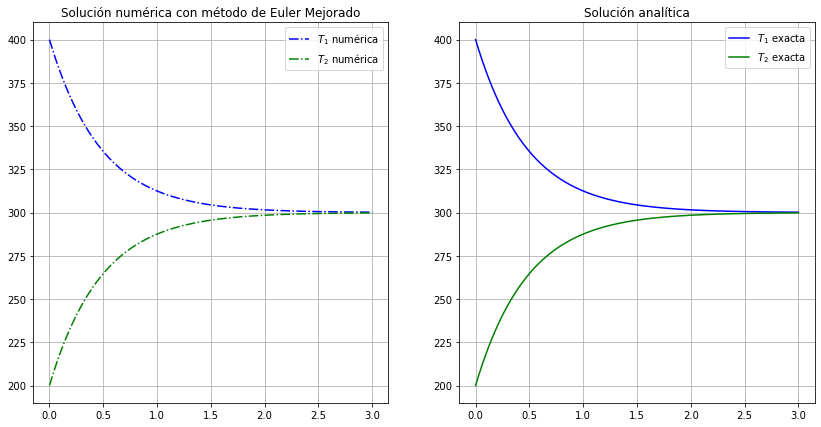

In [33]:
# d) Solución numérica de T1 y T2

##Condiciones iniciales

N = 301
l = 0.3
A = 0.01
k = 389.6
R = 8.314
cv = R*3/2
C = k*A/(cv*l)
t = np.linspace(0, 3, N)
T0 = [400. , 200.]


#Definimos las funciones que equivalen a las derivadas
def f1(T1, T2, C):
    return -C*(T1 - T2)

def f2(T1, T2, C):
    return C*(T1 - T2)

#La soluciión numérica se hará por medio del método de Euler
def GetEuler(f1,f2,T0,t, C):
    
    h = (t[-1] - t[0])/(len(t)-1)
    
    T1 = np.zeros(len(t))
    T2 = np.zeros(len(t))
    
    T1[0] = T0[0]
    T2[0] = T0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    for i in range( 1, len(t) ):
        
        K1[0] = f1(T1[i-1],T2[i-1],C)
        K1[1] = f2(T1[i-1],T2[i-1],C)
        
        
        K2[0] = f1(T1[i-1] + h*K1[0],T2[i-1] + h*K1[1],C)
        K2[1] = f2(T1[i-1] + h*K1[0],T2[i-1] + h*K1[1],C)
              
        
        T1[i] = T1[i-1] + 0.5*h*(K1[0]+K2[0])
        T2[i] = T2[i-1] + 0.5*h*(K1[1]+K2[1])
        
        
    return T1,T2


#Aplicamos el método
T = GetEuler(f1, f2, T0, t, C)

#Se grafican las soluciones y se comparan con la soluciones exactas y el límite termodinámico

T1E = 300 + np.exp(-2*C*t)*100
T2E = 300 - np.exp(-2*C*t)*100

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
ax.plot(t, T[0], label="$T_1$ numérica", ls = "-.", c = "blue")
ax.plot(t, T[1], label="$T_2$ numérica", ls = "-.", c = "green")
ax.legend()
ax.grid()
ax.set_title("Solución numérica con método de Euler Mejorado")

ax1.plot(t, T1E, label="$T_1$ exacta", ls = "-", c = "blue")
ax1.plot(t, T2E, label="$T_2$ exacta", ls = "-", c = "green")
ax1.set_title("Solución analítica")
ax1.legend()
ax1.grid()
